In [24]:
import matplotlib.pyplot as plt
import torch
import vitRet.utils.ckpts as checkpoints
from vitRet.models.pretraining import PretrainModule
import numpy as np

In [2]:
model = PretrainModule.load_from_checkpoint(checkpoints.ProjectorCkpt.DEPTH_32)

In [3]:
foo = torch.randn(1, 3, 1024, 1024).cuda()
segments = torch.linspace(0, 64, 1024**2).view(1, 1, 1024, 1024).cuda()

input1, input2 = model(foo, segments)

/home/clement/miniconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


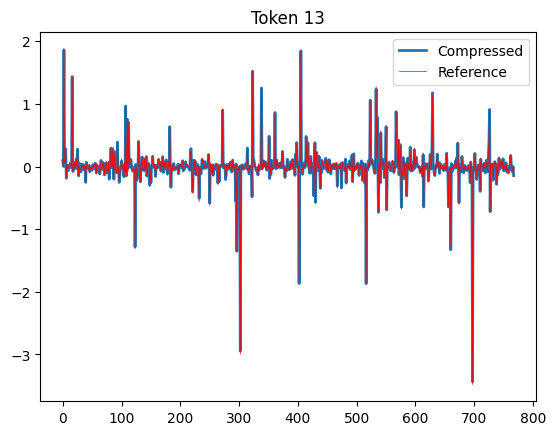

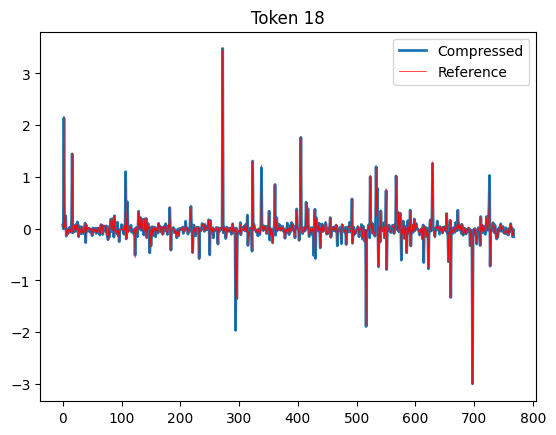

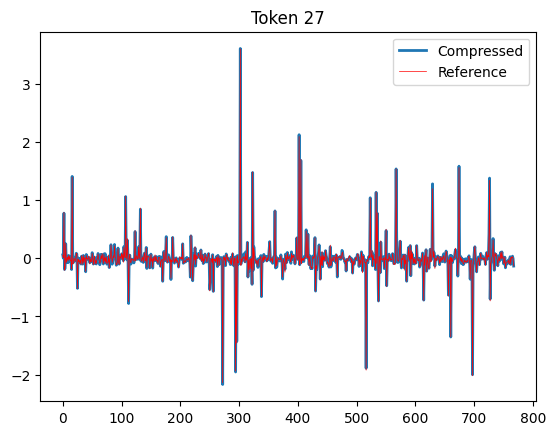

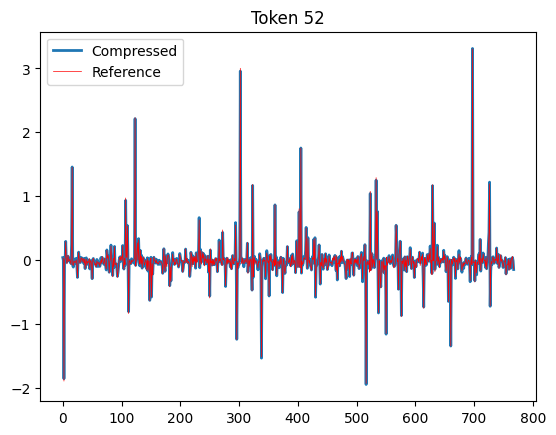

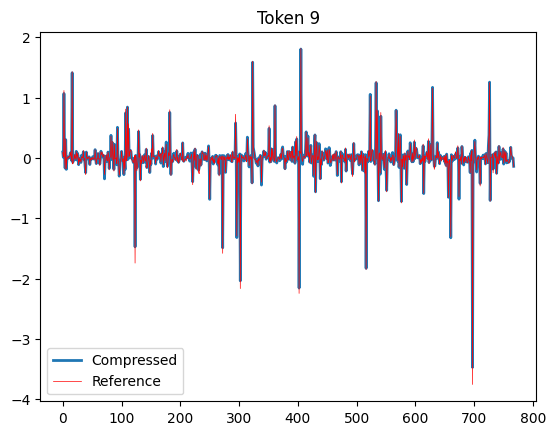

In [33]:
for index in np.random.randint(0, input1.shape[1], 5):

    plt.plot(input1.squeeze().detach().cpu().numpy()[index], linewidth=2, label='Compressed')
    plt.plot(input2.squeeze().detach().cpu().numpy()[index], alpha=1, label='Reference', 
             linewidth=0.5, color='red')
    plt.title(f'Token {index}')
    plt.legend()
    plt.show()

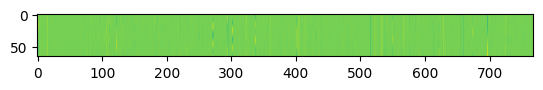